In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
load_dotenv()
import warnings
warnings.filterwarnings("ignore")

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={
'axes.facecolor': '#FFF9ED', 
'figure.facecolor': '#FFF9ED'
})
from matplotlib.colors import ListedColormap
colors = ['#EE1E14', '#364BA5']
custom = sns.set_palette(sns.color_palette(colors))
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())
cmap = plt.cm.get_cmap('PuRd')




import psycopg2
conn = psycopg2.connect(
            f"host='{os.getenv('host')}' port='{os.getenv('port')}' dbname='{os.getenv('dbname')}' user='{os.getenv('pg_user')}' password='{os.getenv('pg_password')}'")

In [2]:
artists_listened_to = pd.read_sql_query("SELECT * FROM artists_listened_to", conn)
minutes_per_artist = pd.read_sql_query("SELECT * FROM minutes_per_artist", conn)
most_streamed_artists = pd.read_sql_query("SELECT * FROM most_streamed_artists", conn)
most_streamed_songs = pd.read_sql_query("SELECT * FROM most_streamed_songs", conn)
total_minutes_streamed = pd.read_sql_query("SELECT * FROM total_minutes_streamed", conn)
tracks_listened_to = pd.read_sql_query("SELECT * FROM tracks_listened_to", conn)
newly_discovered_tracks = pd.read_sql_query("SELECT * FROM newly_discovered_tracks", conn)
newly_discovered_artists = pd.read_sql_query("SELECT * FROM newly_discovered_artists", conn)
tracks_per_dow = pd.read_sql_query("""
SELECT EXTRACT(DOW FROM played_at) AS day_of_week, 
    EXTRACT(HOUR FROM played_at) AS hour,
    SUM(SONG_duration_ms / (60 * 100)) AS total_minutes
from public.tracks
GROUP BY day_of_week, hour
ORDER BY total_minutes DESC""", conn)


In [30]:
most_streamed_songs

,track_id,track_name,streams
0,5ry2OE6R2zPQFDO85XkgRb,Money In The Grave (Drake ft. Rick Ross),2
1,7DOMJIfjwgnyBDs928TkHp,understand,2
2,1SWVDBtw6h3tm9OehOkDhv,What's The Difference,2


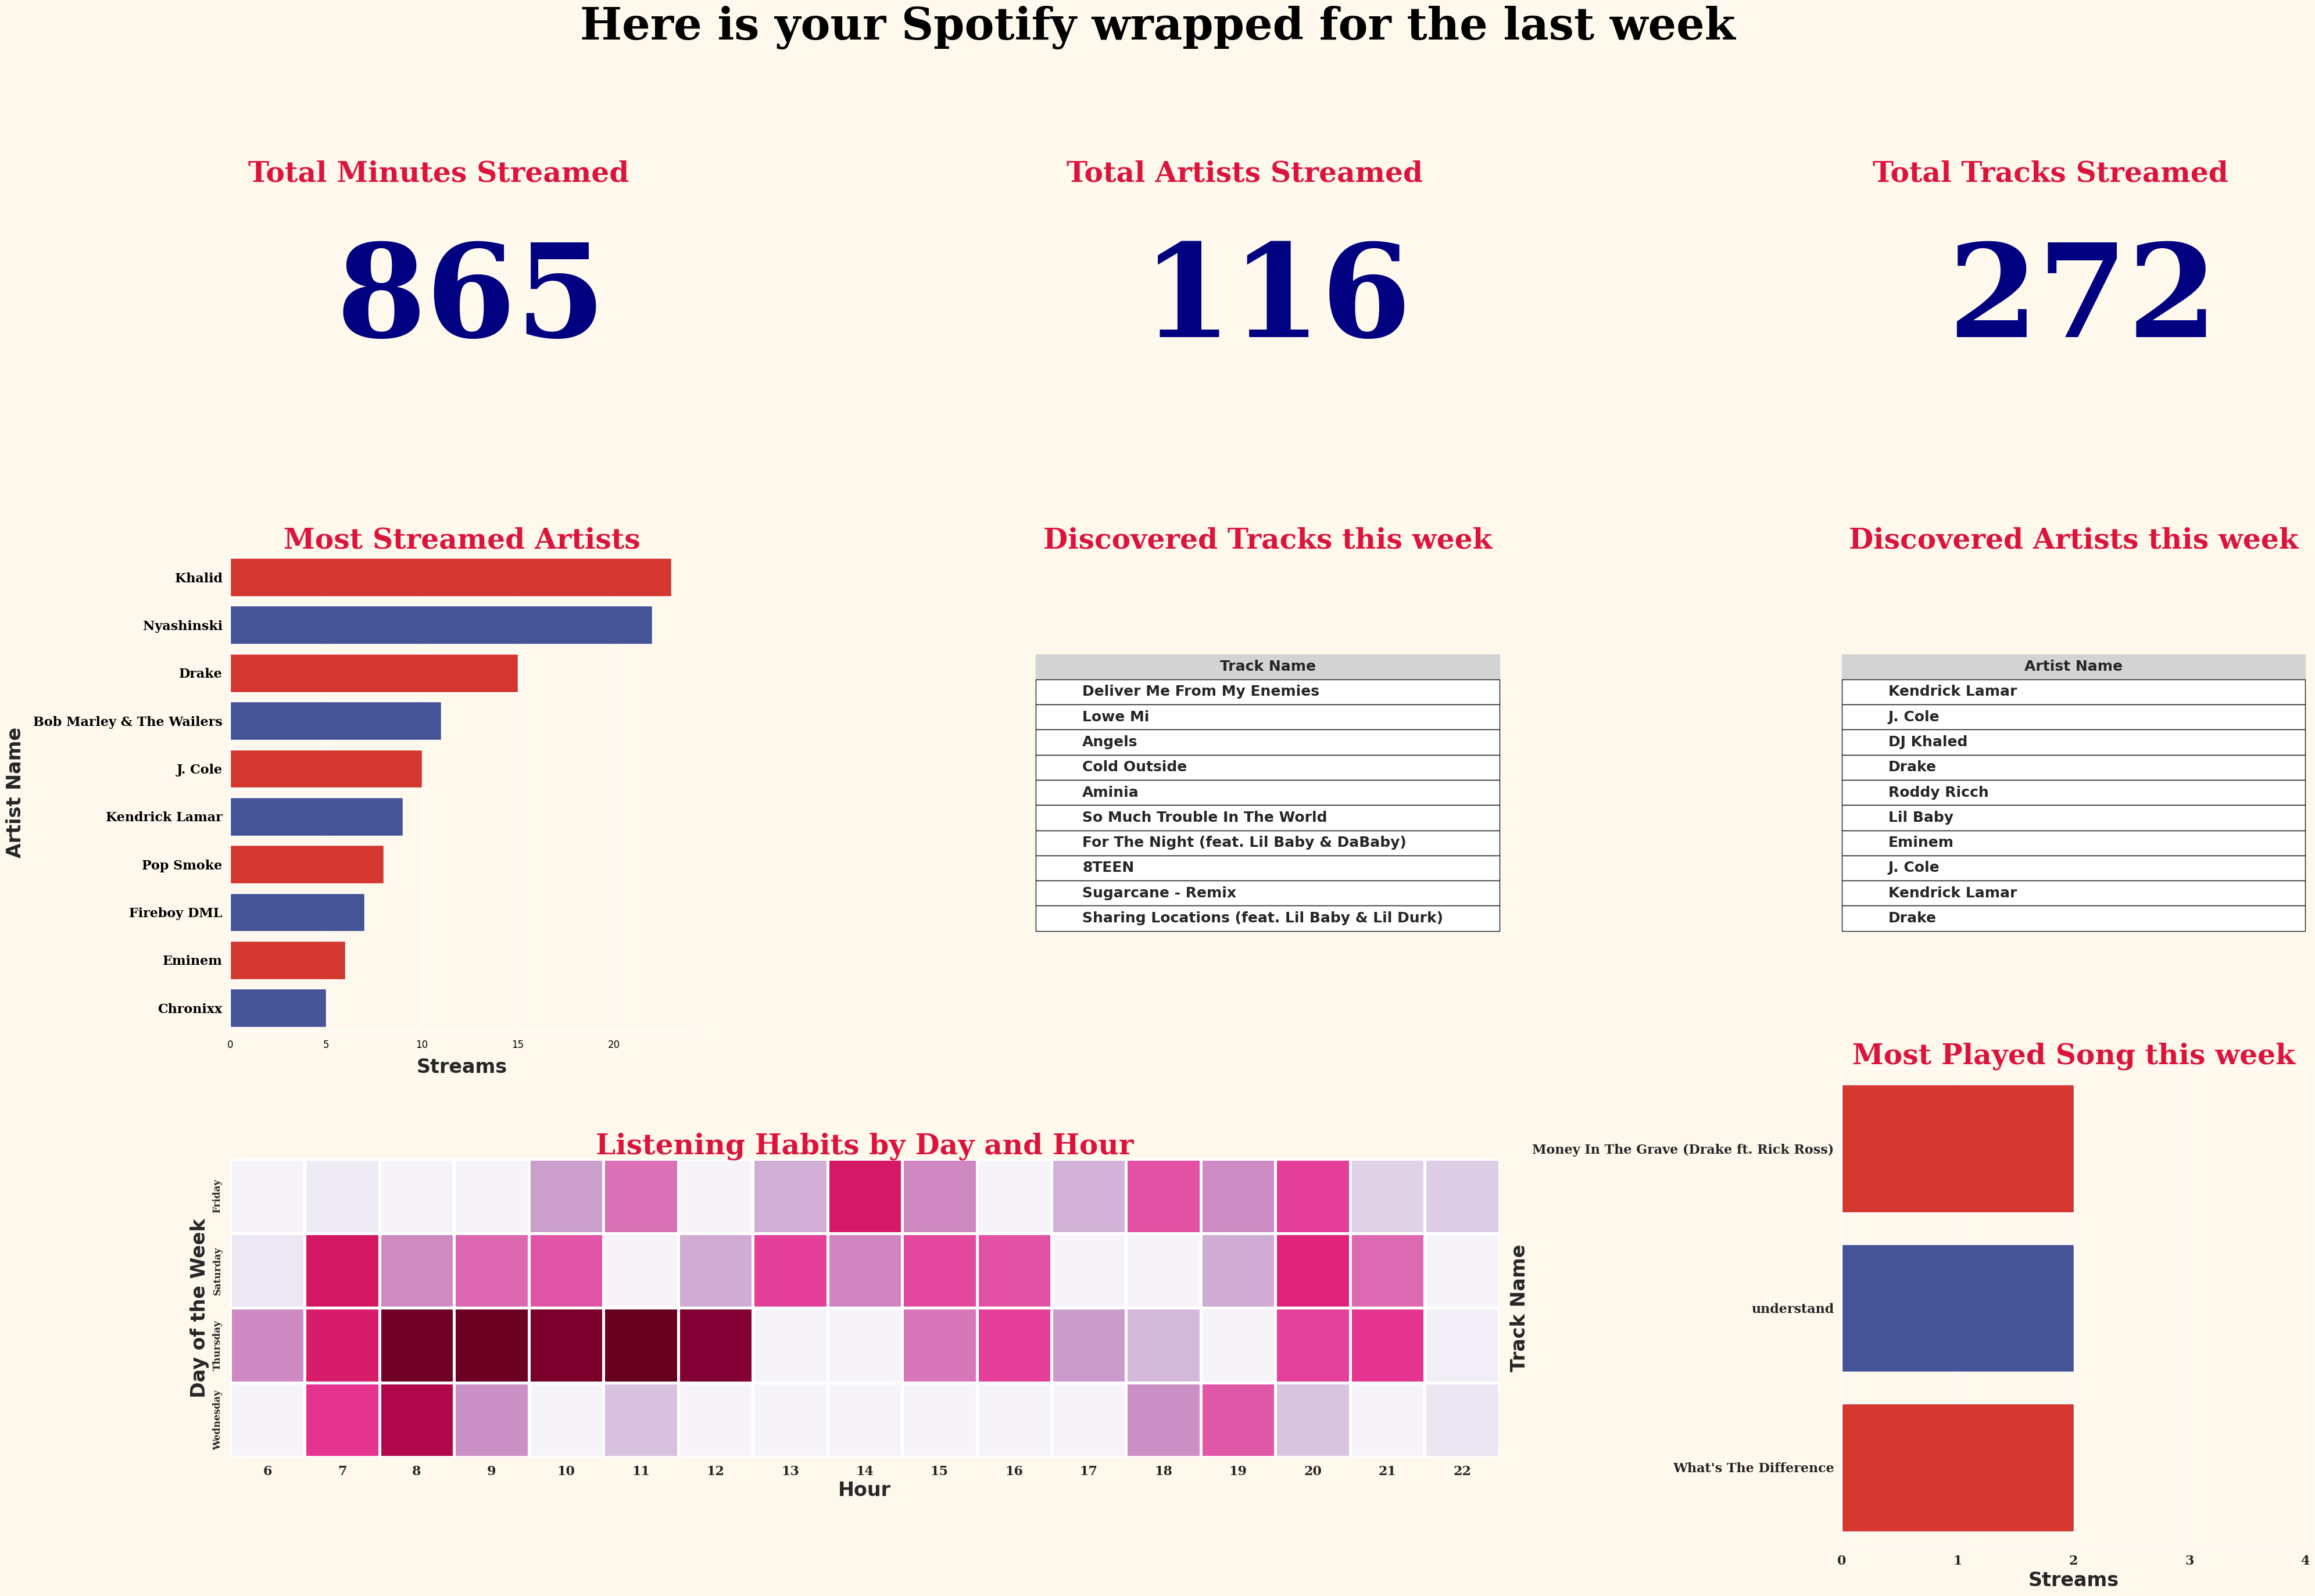

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40, 28))


ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0,2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax8 = plt.subplot2grid((3, 3), (2, 2))

for ax in fig.get_axes():
    if ax in [ax1, ax2, ax3, ax5, ax6]:
        ax.axis('off')

color1 = "crimson"
color2 = "navy"
# axis 1 values
total_minutes = str(total_minutes_streamed.values[0][0])
ax1.text(0.45, 0.70, "Total Minutes Streamed", fontweight="bold", fontsize=35, color=color1, fontfamily="serif", ha="center")
ax1.text(0.52, 0.45, total_minutes, fontweight="bold", fontsize=160, color=color2, fontfamily="serif", ha="center", va="center")

# empty request

# Axis 2 values
artists_listened = artists_listened_to.values[0][0]
ax2.text(0.45, 0.70, "Total Artists Streamed", fontweight="bold", fontsize=35, color=color1, fontfamily="serif", ha="center")
ax2.text(0.52, 0.45, artists_listened, fontweight="bold", fontsize=160, color=color2, fontfamily="serif", ha="center", va="center")

# axis 3 values
tracks_no = tracks_listened_to.values[0][0]
ax3.text(0.45, 0.70, "Total Tracks Streamed", fontweight="bold", fontsize=35, color=color1, fontfamily="serif", ha="center")
ax3.text(0.52, 0.45, tracks_no, fontweight="bold", fontsize=160, color=color2, fontfamily="serif", ha="center", va="center")

# axis 4 values
ax4.set_title("Most Streamed Artists", fontweight="bold", fontsize=35, color=color1, fontfamily="serif")
sns.barplot(
    y="artist_name",
    x="streams",
    data=most_streamed_artists,
    palette=colors,
    ax=ax4
)

### Show y-axis labels
artists = most_streamed_artists['artist_name'].head().tolist()
streams =  most_streamed_artists['streams'].head().tolist()
ax4.set_xlabel("Streams", fontsize=24, fontweight="bold", labelpad=10)
ax4.set_ylabel("Artist Name", fontsize=24, fontweight="bold", labelpad=10)

ax4.tick_params(axis="y", labelsize=12, labelcolor="black")
ax4.tick_params(axis="x", labelsize=12, labelcolor="black")

# Remove top and right spines
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)


ax4.set_yticklabels(ax4.get_yticklabels(), fontsize=16, fontweight="bold", fontfamily="serif")



# axis 5 values
table = ax5.table(cellText=newly_discovered_tracks.head(10).values, colLabels=["Track Name"], loc='center')

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1, 2)
for cell in table._cells:
    table._cells[cell].set_text_props(weight='bold', ha="left")

header_cells = table._cells[(0, 0)]
header_cells.set_text_props(weight='bold', ha='center')
header_cells.set_color('lightgray')


ax5.set_title("Discovered Tracks this week", fontweight="bold", fontsize=35, color=color1, fontfamily="serif")


# axis 6 values
table = ax6.table(cellText=newly_discovered_artists.head(10).values, colLabels=["Artist Name"], loc='center')

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1, 2)
for cell in table._cells:
    table._cells[cell].set_text_props(weight='bold', ha="left")


header_cells = table._cells[(0, 0)]
header_cells.set_text_props(weight='bold', ha='center')
header_cells.set_color('lightgray')
    
ax6.set_title("Discovered Artists this week", fontweight="bold", fontsize=35, color=color1, fontfamily="serif")


# axis 7 values
dow_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
tracks_per_dow['day_of_week'] = tracks_per_dow['day_of_week'].replace(dow_mapping)
df = pd.crosstab(
    index = tracks_per_dow['day_of_week'],
    columns = tracks_per_dow['hour'].astype("int"),
    values= tracks_per_dow['total_minutes'],
    aggfunc="sum"
).fillna(0)
sns.heatmap(df, 
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            cmap=cmap,
              ax=ax7)
ax7.set_title('Listening Habits by Day and Hour', fontweight="bold", fontsize=35, color=color1, fontfamily="serif")

ax7.set_xlabel('Hour', fontsize=24, fontweight='bold')
ax7.set_ylabel('Day of the Week', fontsize=24, fontweight='bold')
ax7.set_yticklabels(ax7.get_yticklabels(), fontsize=12, fontweight="bold", fontfamily="serif")
ax7.set_xticklabels(ax7.get_xticklabels(), fontsize=16, fontweight="bold", fontfamily="serif")

ax7.spines['top'].set_visible=False


# axis 8 values
sns.barplot(
    y='track_name', 
    x='streams', 
    data=most_streamed_songs, 
    palette=colors,
    ax=ax8)
ax8.set_xlabel('Streams', fontsize=24, fontweight='bold')
ax8.set_ylabel('Track Name', fontsize=24, fontweight='bold')

ax8.set_yticklabels(ax8.get_yticklabels(), fontsize=16, fontweight="bold", fontfamily="serif")
num_ticks = len(most_streamed_songs['streams']) + 2
ax8.set_xticks(range(num_ticks))
ax8.set_xticklabels([int(x) for x in ax8.get_xticks()], fontsize=16, fontweight="bold", fontfamily="serif")

ax8.set_title("Most Played Song this week", fontweight="bold", fontsize=35, color=color1, fontfamily="serif")



title="Here is your Spotify wrapped for the last week"
plt.suptitle(title, fontweight="bold", fontsize=55, color="black", fontfamily="serif")
plt.tight_layout()
plt.show()
